<a href="https://colab.research.google.com/github/gerbeldo/2022-dma-final/blob/main/0_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
#from IPython.display import display, HTML

%matplotlib inline
#pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = [12.0, 8.0]



In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Carga de datos

Cargamos datos de entrenamiento directamente desde el repositorio en github.

In [ ]:
train = pd.read_csv("https://github.com/gerbeldo/2022-dma-final/blob/main/train.csv.zip?raw=true", compression = "zip")

# EDA

Viendo la forma del DataFrame, vemos que unicamente la columna `Name` tiene datos nulos

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

## AdoptionSpeed

Graficamos histograma de `AdoptionSpeed`; 0 representa la adopcion mas rápida. Vemos que las clases, salvo la velocidad 0 estan razonablemente representadas en el dataset.

Text(0.5, 1.0, 'AdoptionSpeed histogram')

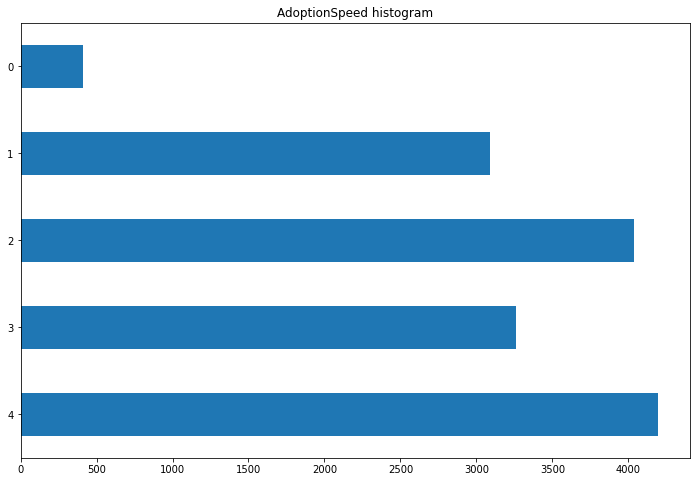

In [ ]:
(train['AdoptionSpeed']
    .value_counts()
    .sort_index(ascending = False)
    .plot(kind='barh'))

plt.title("AdoptionSpeed histogram")

Separando por tipo de mascota. gatos = 1, perros = 2. Vemos que hay buena representación de ambas especies en cada velocidad. 

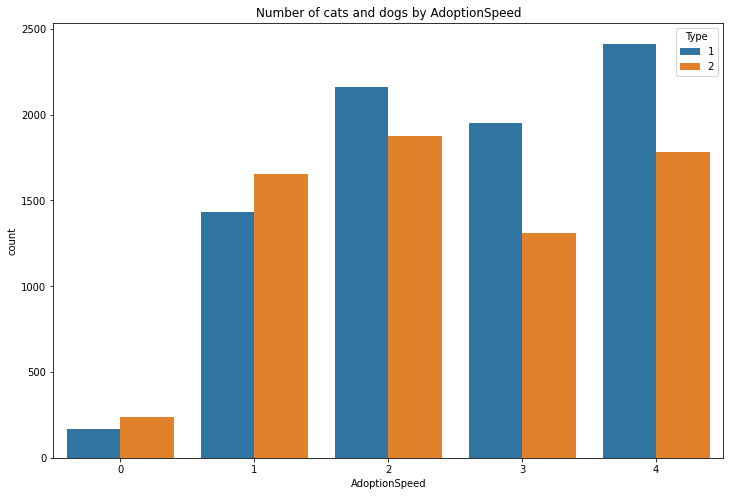

In [ ]:
sns.countplot(x='AdoptionSpeed', data=train, hue='Type');
plt.title('Number of cats and dogs by AdoptionSpeed');

## PhotoAmt

`PhotoAmt` deberia ser una variable int, pero esta representada como float. 

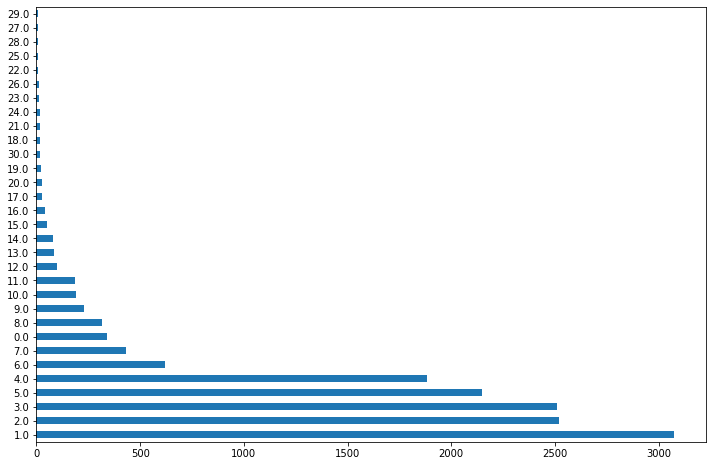

In [ ]:
(train['PhotoAmt']
 .value_counts()
 .plot(kind = "barh"))

In [ ]:
train = train.astype({'PhotoAmt' : int})

# Nulos

In [ ]:
(train
.drop("Description", axis = 1)
.describe()
.transpose()
)

,count,mean,std,min,25%,50%,75%,max
Type,14993.0,1.457614,0.498217,1.0,1.0,1.0,2.0,2.0
Age,14993.0,10.452078,18.155790,0.0,2.0,3.0,12.0,255.0
Breed1,14993.0,265.272594,60.056818,0.0,265.0,266.0,307.0,307.0
Breed2,14993.0,74.009738,123.011575,0.0,0.0,0.0,179.0,307.0
Gender,14993.0,1.776162,0.681592,1.0,1.0,2.0,2.0,3.0
Color1,14993.0,2.234176,1.745225,1.0,1.0,2.0,3.0,7.0
Color2,14993.0,3.222837,2.742562,0.0,0.0,2.0,6.0,7.0
Color3,14993.0,1.882012,2.984086,0.0,0.0,0.0,5.0,7.0
MaturitySize,14993.0,1.862002,0.547959,1.0,2.0,2.0,2.0,4.0
FurLength,14993.0,1.467485,0.599070,1.0,1.0,1.0,2.0,3.0


Contamos los ceros y calculamos la proporcion en cada columna. En algunas variables, como las `Breed` o `Color` representan valores faltantes. Las variables `Breed2` y `Color3` tienen alta proporcion de faltantes, por lo que las eliminamos. La variable `Fee` tambien tiene muy alta proporcion de ceros, pero no son faltantes. Lo mismo con la variable `VideoAmt`.

In [ ]:
def count_zeros(array):
    n_zeros = sum(array == 0)
    prop_zeros = round(n_zeros / len(array), 2)
    return [n_zeros, prop_zeros]

(train
 .select_dtypes(include = "int64")
 .apply(count_zeros)
 .transpose()
 )


,0,1
Type,0.0,0.00
Age,179.0,0.01
Breed1,5.0,0.00
Gender,0.0,0.00
Color1,0.0,0.00
Color2,4471.0,0.30
MaturitySize,0.0,0.00
FurLength,0.0,0.00
Vaccinated,0.0,0.00
Dewormed,0.0,0.00


In [ ]:
train.drop(["Breed2", "Color3"], axis = 1, inplace = True)

## Categoricas

Mirando las variables no numericas, vemos que las mayúsculas podrían ser un problema, por lo que las transformamos a minúsculas y vemos si cambian las counts. De mínima hacemos esto por los nombres, eventualmente las descripciones las vamos a tokenizar.

In [ ]:
(
train
    .describe(include="object")
    .transpose()
)


,count,unique,top,freq
Name,13736,9060,Baby,66
RescuerID,14993,5595,fa90fa5b1ee11c86938398b60abc32cb,459
Description,14981,14032,For Adoption,164
PetID,14993,14993,86e1089a3,1


In [ ]:
train = (train
         .applymap(lambda s: s.lower() if type(s) == str else s)
 )

train.describe(include = "object").transpose()


,count,unique,top,freq
Name,13736,8846,baby,67
RescuerID,14993,5595,fa90fa5b1ee11c86938398b60abc32cb,459
Description,14981,14011,for adoption,185
PetID,14993,14993,86e1089a3,1


## RescuerID

Alta cardinalidad, pero quiza haya informacion util aca...

In [ ]:
sum((train["RescuerID"]
.value_counts()) <= 3)

4909